Funktion zum Auslesen einer Reihe von Werten aus der Karte und ihrer Darstellung.

Funktion, die eine Konsoleneingabe auf die Karte ausgibt.

In [1]:
#import redlab as rl
#
#print("------- einzelne Werte -------------------------")
#print("16 Bit Value: " + str(rl.cbAIn(0, 0, 1)))
#print("Voltage Value: " + str(rl.cbVIn(0, 0, 1)))
#print("------- Messreihe -------------------------")
#print("Messreihe: " + str(rl.cbAInScan(0, 0, 0, 300, 8000, 1)))
#print("Messreihe: " + str(rl.cbVInScan(0, 0, 0, 300, 8000, 1)))
#print("------- Ausgabe -------------------------")
#print("Voltage Value: " + str(rl.cbVOut(0, 0, 101, 2.5)))
#print("------- Ausgabe -------------------------")
#text = input("Spannung eingeben\n")
#print("Voltage Value: " + str(rl.cbVOut(0, 0, 101, float(text))))

ModuleNotFoundError: No module named 'redlab'

Berechnen Sie den theoretischen Quantisierungsfehler des 11-Bit-AD-Wandlers (−10 V ...10 V )

In [11]:
umax = 10
umin = -10
n = 11

delta_u = (umax - umin) / (2**n)
print("Theoretischer Quantisierungsfehler des 11-Bit-AD-Wandlers: ", delta_u)

Theoretischer Quantisierungsfehler des 11-Bit-AD-Wandlers:  0.009765625


In [9]:
# get current working directory
import os
import numpy as np

path = os.getenv('DATA_PATH')
if not path:
    raise ValueError("DATA_PATH environment variable is not set")

# Read in csv for part 2
voltage_meters_measurements_path = f"{path}\\Versuch5_Messungen\\Teil2.CSV"
with open(voltage_meters_measurements_path, 'r') as file:
    lines = file.read().splitlines()[1:] # skip header

voltage_meters_measurements_data = []
for x in lines:
    voltage_meters_measurements_data.append([float(y.replace(',', '.')) for y in x.split(';')])
voltage_meters_measurements_data = np.array(voltage_meters_measurements_data)
print(voltage_meters_measurements_data)

voltage_fine_measurement = voltage_meters_measurements_data[:,2]

voltage_voltcraft = voltage_meters_measurements_data[:,1]
voltage_ad_converter = voltage_meters_measurements_data[:,3]
voltage_picoscope = voltage_meters_measurements_data[:,4]

# calculate measurement error
error_voltcraft = voltage_fine_measurement - voltage_voltcraft
error_ad_converter = voltage_fine_measurement - voltage_ad_converter
error_picoscope = voltage_fine_measurement - voltage_picoscope

# calculate standard deviation
std_voltcraft = np.std(error_voltcraft, ddof=1)
print("Standard deviation of Voltcraft: ", std_voltcraft)
std_ad_converter = np.std(error_ad_converter, ddof=1)
print("Standard deviation of AD Converter: ", std_ad_converter)
std_picoscope = np.std(error_picoscope, ddof=1)
print("Standard deviation of Picoscope: ", std_picoscope)

[[ 1.          1.055       1.0555      1.06445312  1.085     ]
 [ 2.          2.061       2.0607      2.06054688  2.088     ]
 [ 3.          3.066       3.06422     3.06640625  3.1       ]
 [ 4.          4.07        4.06779     4.07226562  4.11      ]
 [ 5.          5.07        5.072       5.078125    5.113     ]
 [ 6.          6.08        6.0761      6.08398438  6.115     ]
 [ 7.          7.04        7.0328      7.03125     7.079     ]
 [ 8.          8.04        8.037       8.03710938  8.1       ]
 [ 9.          9.05        9.0413      9.04296875  9.11      ]
 [10.         10.05       10.0457      9.99023438 10.11      ]]
Standard deviation of Voltcraft:  0.003319291925831538
Standard deviation of AD Converter:  0.01891476959375192
Standard deviation of Picoscope:  0.014736256459645249


Die Standardabweichung des Voltcraft Messgeräts ist die geringste, gefolgt von dem Picoscope und dem AD-Wandler.
Wenn man davon ausgeht, dass das Feinmessgerät die korrekten Werte anzeigt, dann ist das Voltcraft Messgerät das genaueste von den dreien.

Theoretischen Quantisierungsfehler des 10-Bit-DA-Wandlers (0 V ...5 V ) berechnen.


In [12]:
umax = 5
umin = 0
n = 10

delta_u = (umax - umin) / (2**n)
print("Theoretischer Quantisierungsfehler des 10-Bit-AD-Wandlers: ", delta_u)

Theoretischer Quantisierungsfehler des 10-Bit-AD-Wandlers:  0.0048828125


In [14]:
# Read in csv for part 3
oscilloscope_measurements_path = f"{path}\\Versuch5_Messungen\\Teil3.CSV"
with open(oscilloscope_measurements_path, 'r') as file:
    lines = file.read().splitlines()[1:] # skip header

oscilloscope_measurements_data = []
for x in lines:
    oscilloscope_measurements_data.append([float(y.replace(',', '.')) for y in x.split(';')])
oscilloscope_measurements_data = np.array(oscilloscope_measurements_data)
print(oscilloscope_measurements_data)

requested_voltage = oscilloscope_measurements_data[:,0]
voltage_oscilloscope = oscilloscope_measurements_data[:,1]
error_oscilloscope = requested_voltage - voltage_oscilloscope
std_oscilloscope = np.std(error_oscilloscope, ddof=1)
print("Standard deviation of Oscilloscope: ", std_oscilloscope)

[[0.5   0.561]
 [1.    1.122]
 [1.5   1.512]
 [2.    2.058]
 [2.5   2.62 ]
 [3.    3.128]
 [3.5   3.556]
 [4.    4.117]
 [4.5   4.677]
 [5.    5.057]]
Standard deviation of Oscilloscope:  0.04927654389035183


10-fach höher als der theoretische Quantisierungsfehler des 10-Bit-DA-Wandlers.
Fehler mit Umsetzung des AD-Wandlers + Fehler beim Messen mit dem Oszilloskop.

Teil 5:
Wir haben 6000 Hz als Abtastfrequenz ausgewählt.
Die Nyquist-Frequenz ist die Hälfte der Abtastfrequenz, also 3000 Hz.

In [ ]:
## This is a sample Python script.
#
#import redlab as rl
#import csv
#
#
#print("------- Messreihe -------------------------")
#messreihe = rl.cbVInScan(0, 0, 0, 1000, 6000, 1)
#print("Messreihe: " + str(messreihe))
#
## Save to CSV
#filename = "teil5_1500"
#with open(filename, mode='w', newline='') as file:
#    writer = csv.writer(file)
#
#    for value in messreihe:
#        writer.writerow([value])

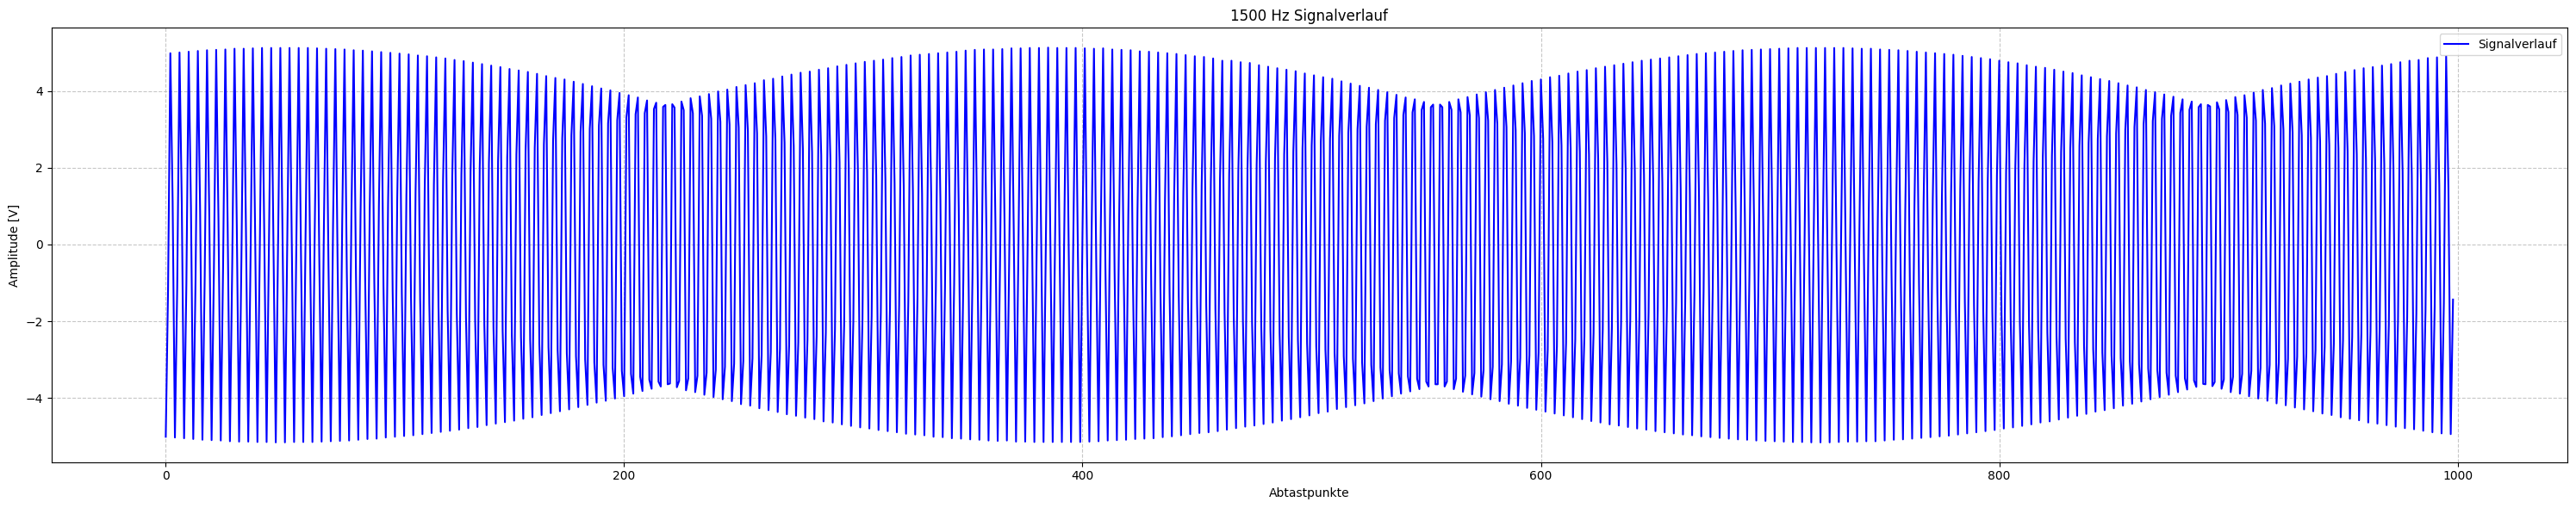

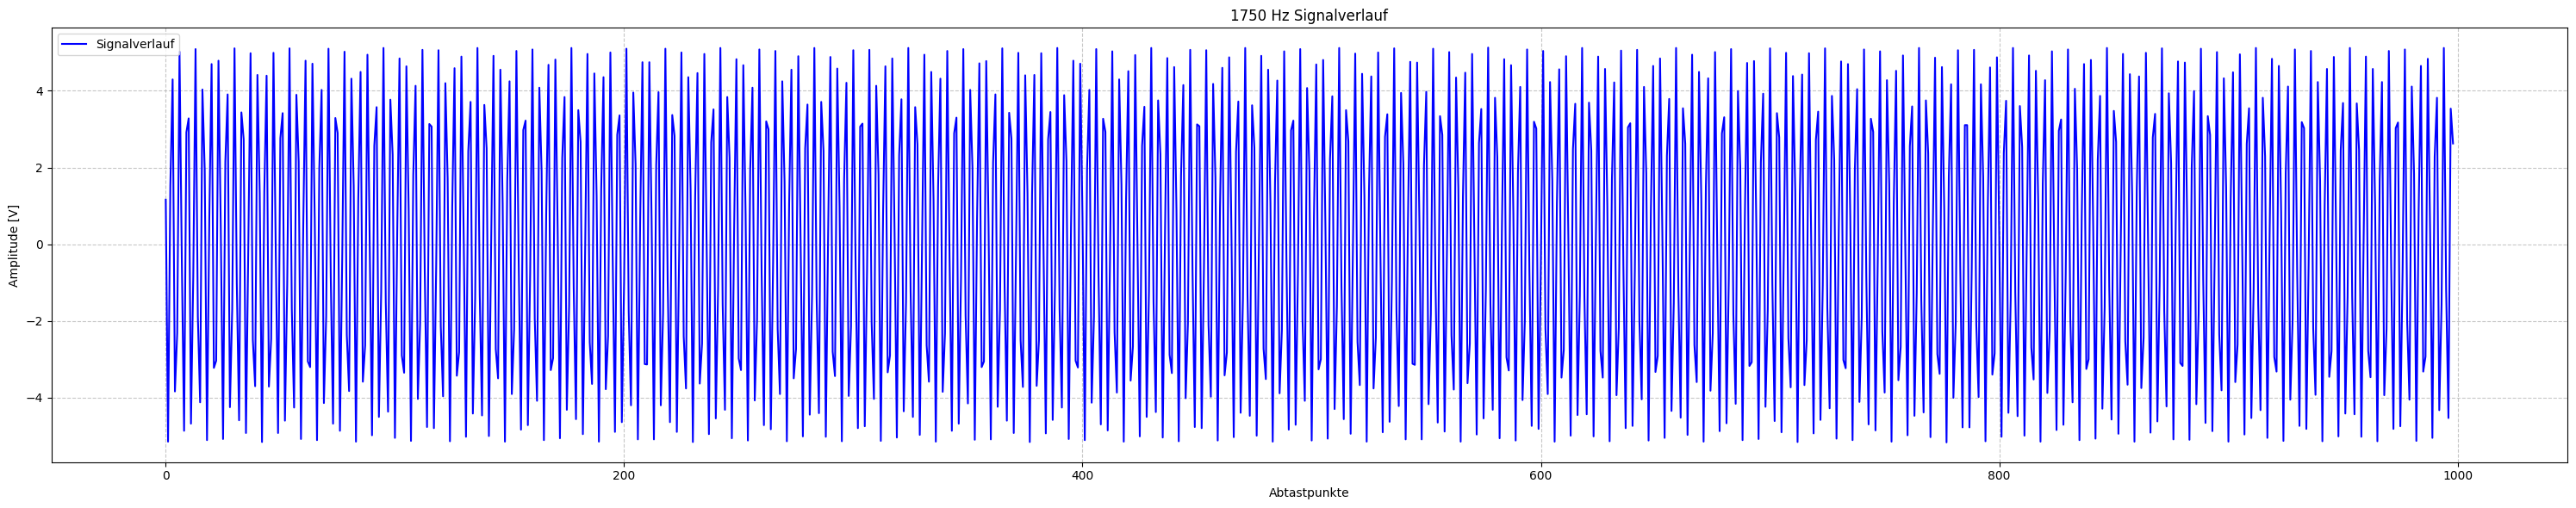

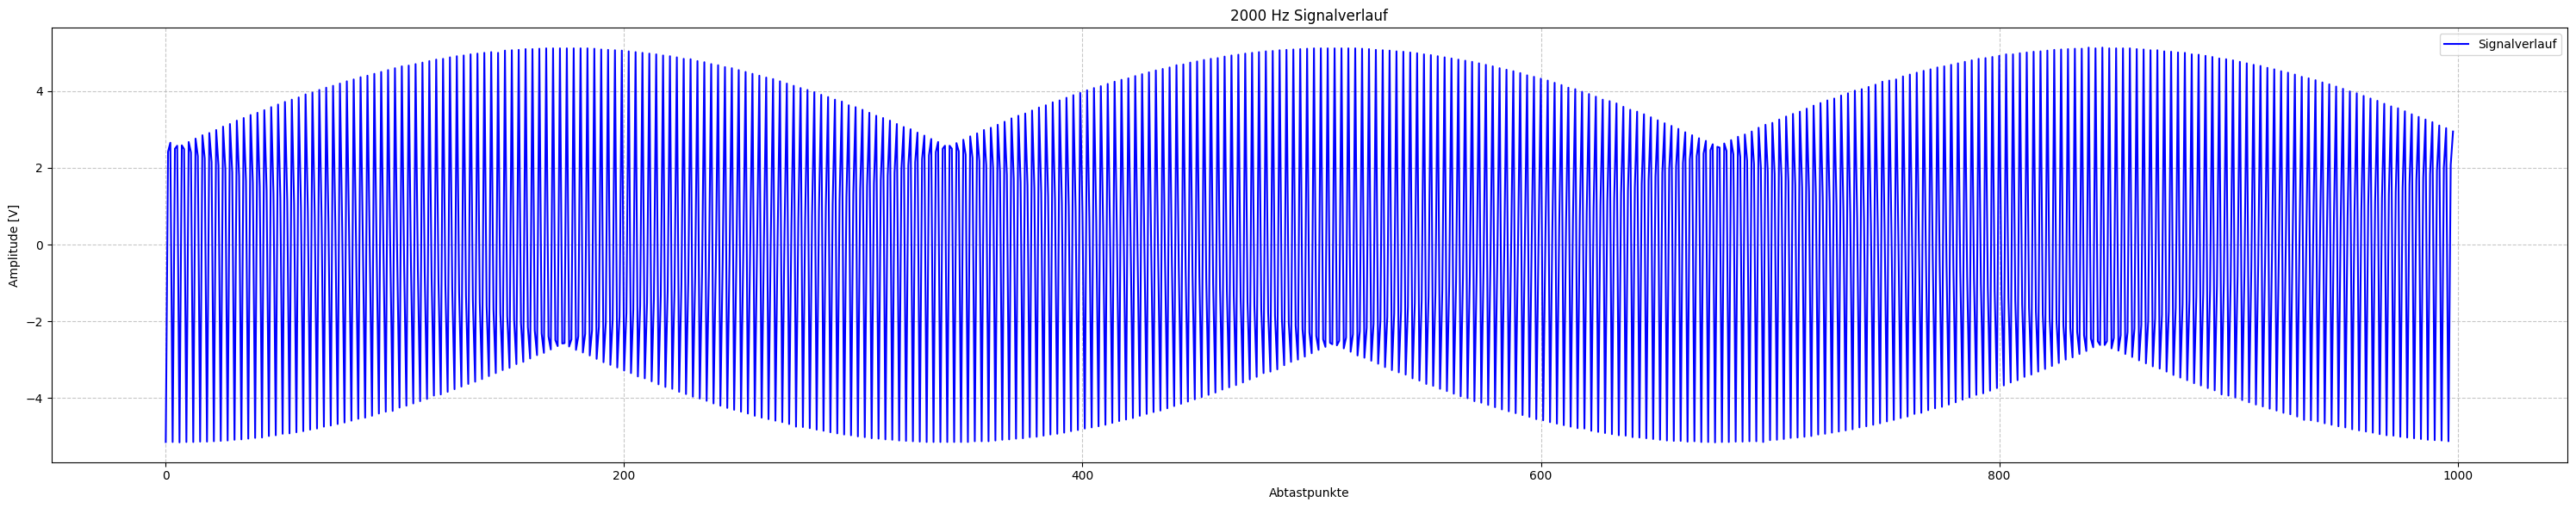

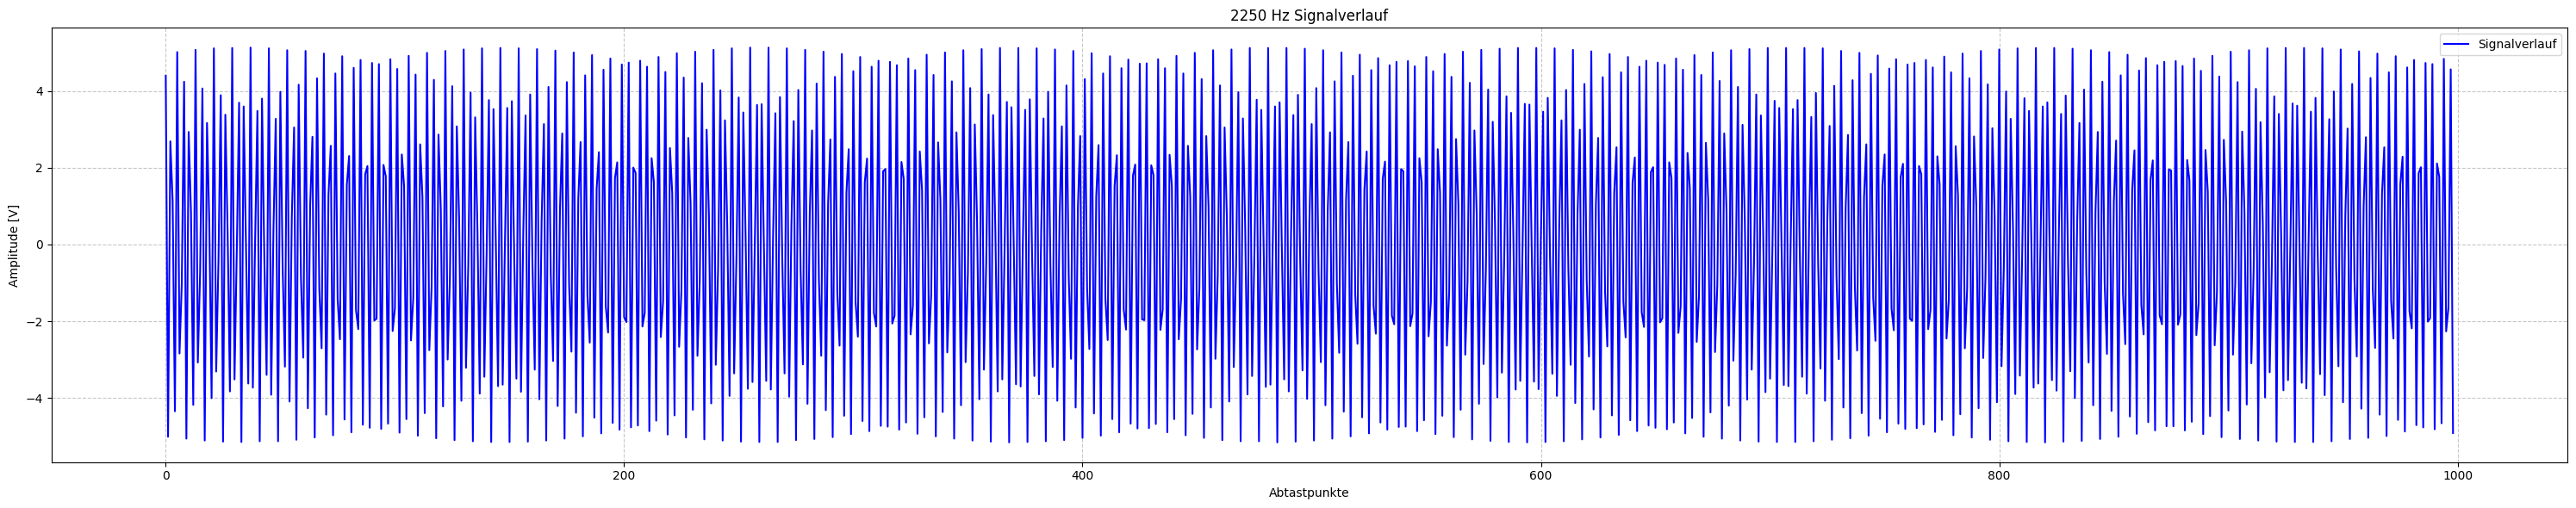

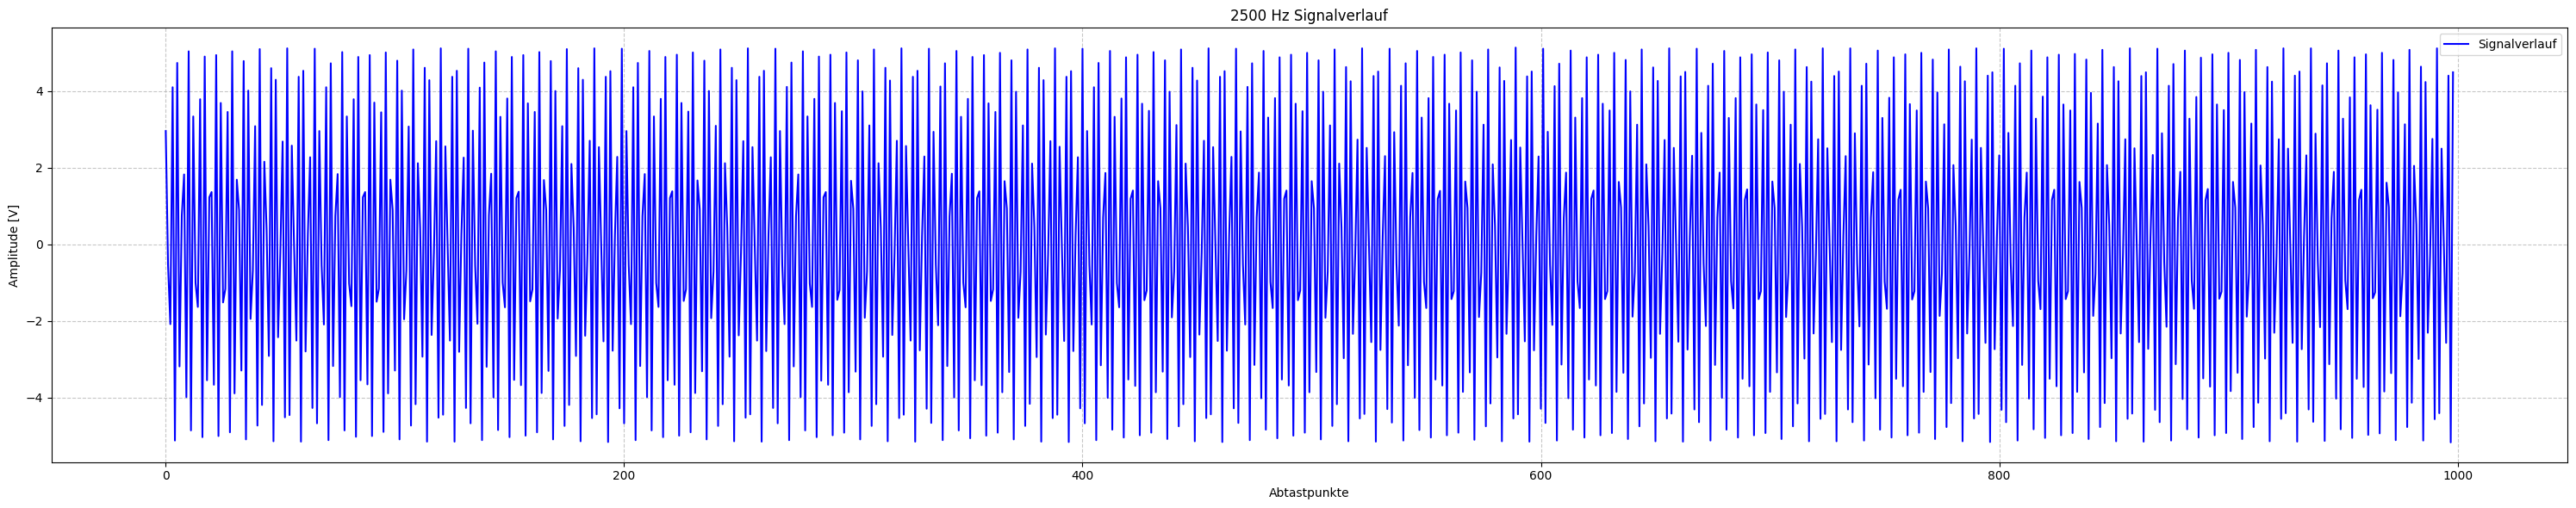

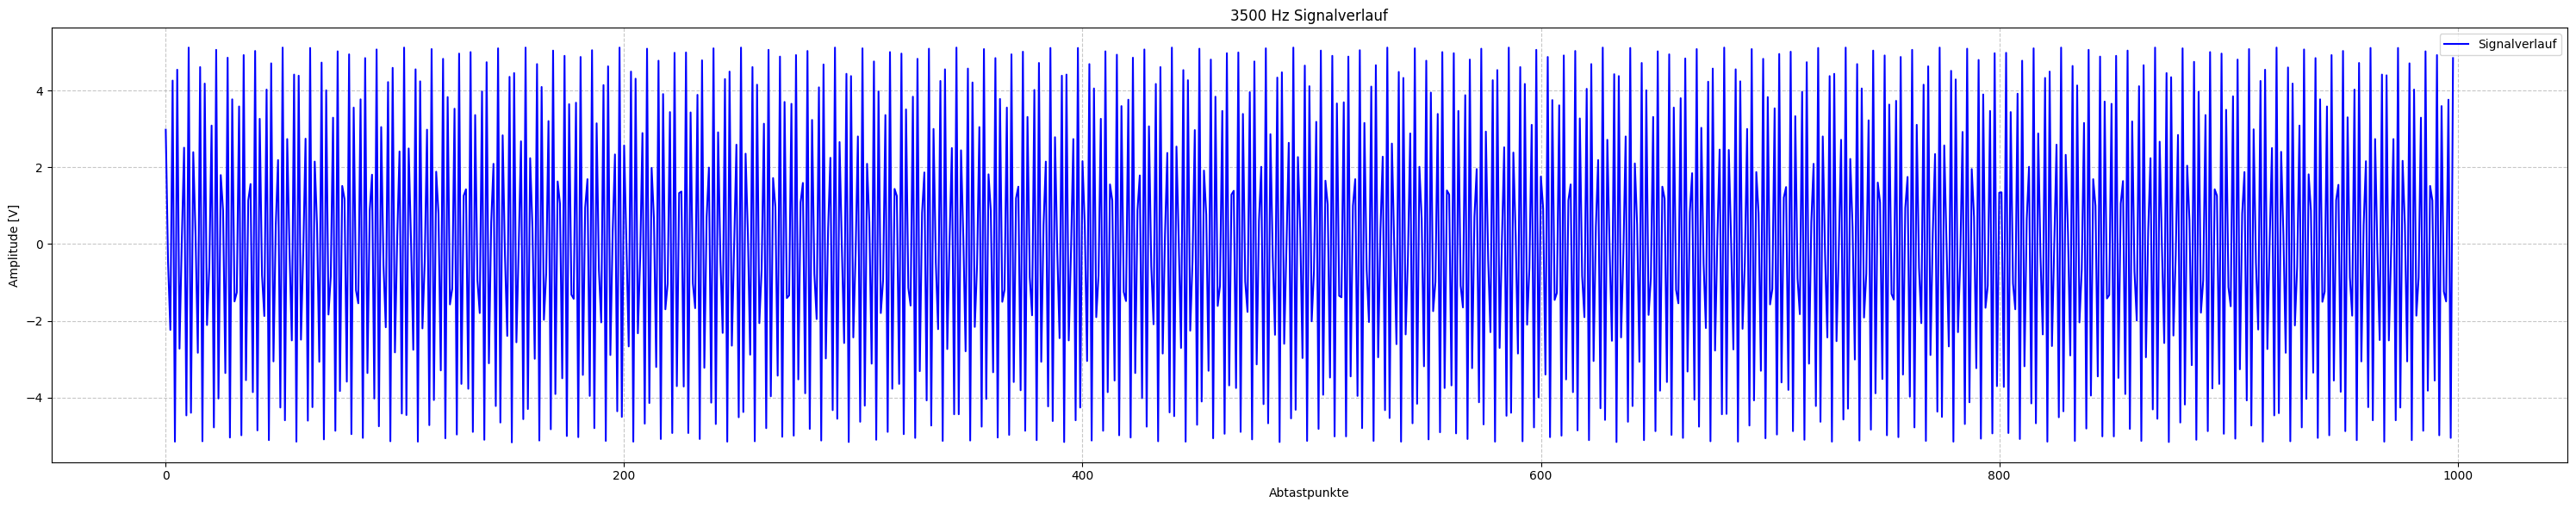

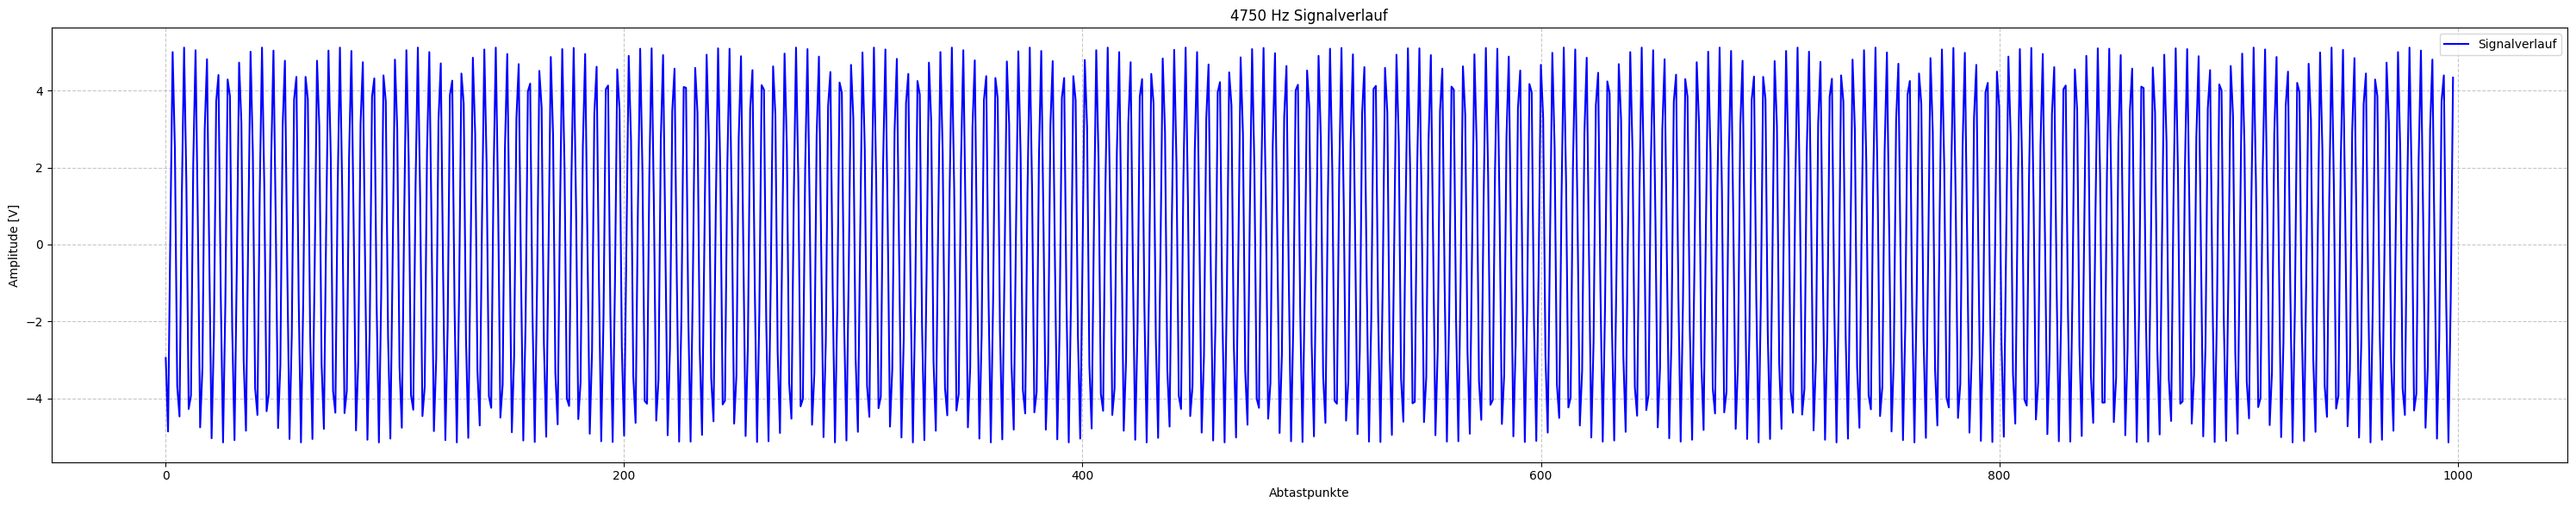

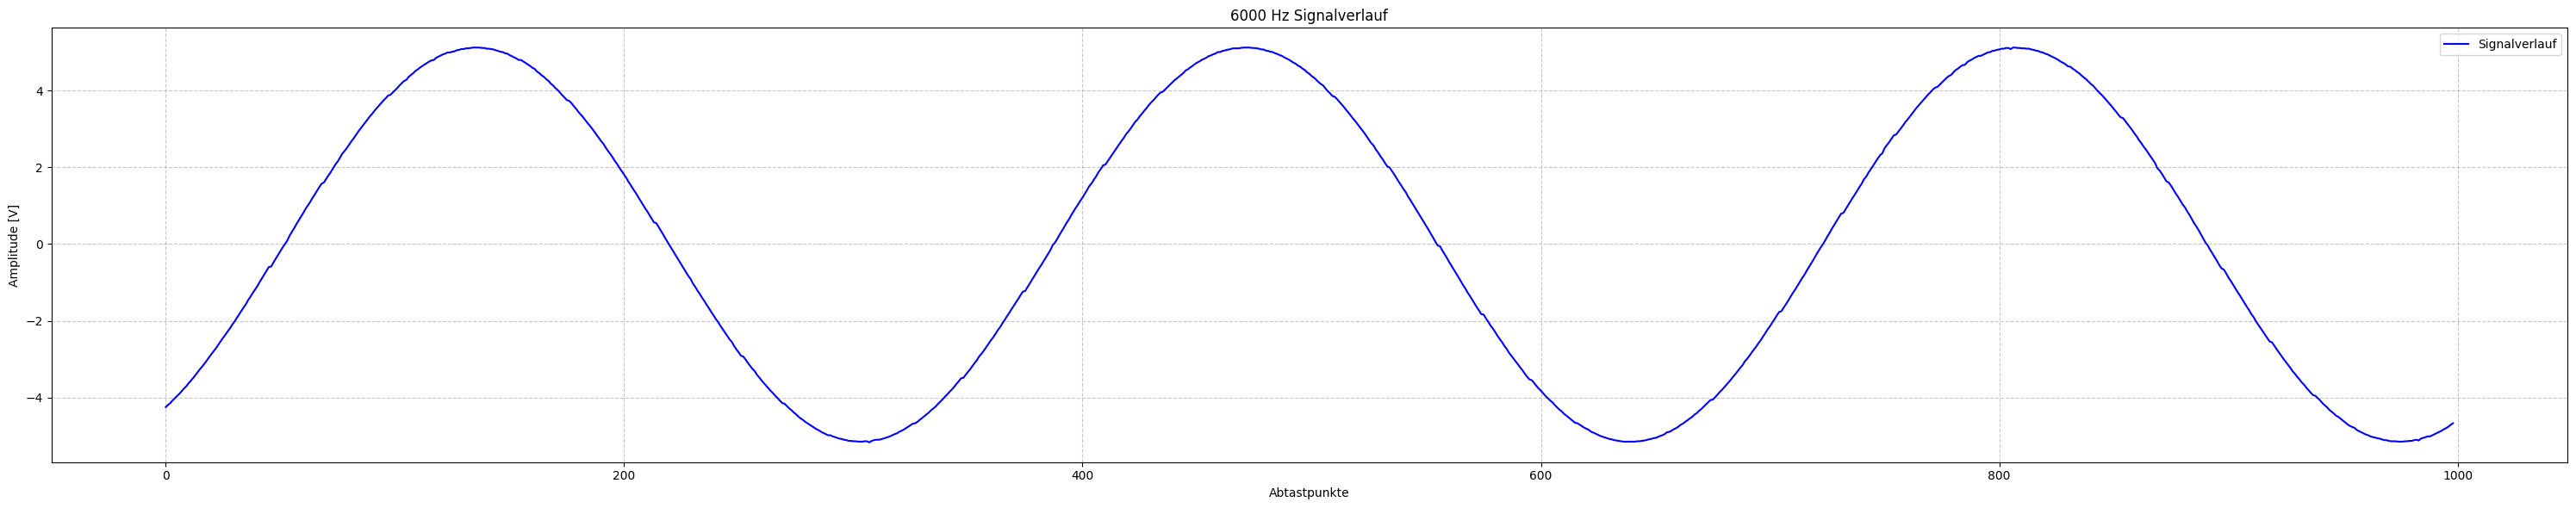

In [18]:
# Read in csv for part 5
def plot_signal(data_path, title):
	ad_measurements_path = f"{path}\\Versuch5_Messungen\\{data_path}"
	with open(ad_measurements_path, 'r') as file:
		lines = file.read().splitlines()[1:] # skip header
	
	ad_measurements_data = []
	for x in lines:
		ad_measurements_data.append([float(y.replace(',', '.')) for y in x.split(';')])
	ad_measurements_data = np.array(ad_measurements_data)
	
	# Show signal
	import matplotlib.pyplot as plt
	plt.figure(figsize=(30, 6))
	plt.plot(ad_measurements_data[:,0], label="Signalverlauf", color='blue')
	plt.xlabel("Abtastpunkte")
	plt.ylabel("Amplitude [V]")
	plt.title(title)
	plt.grid(True, linestyle='--', alpha=0.7)
	plt.legend()
	plt.tight_layout()
	plt.show()
    
plot_signal("teil5_1500", "1500 Hz Signalverlauf")
plot_signal("teil5_1750", "1750 Hz Signalverlauf")
plot_signal("teil5_2000", "2000 Hz Signalverlauf")
plot_signal("teil5_2250", "2250 Hz Signalverlauf")
plot_signal("teil5_2500", "2500 Hz Signalverlauf")
plot_signal("teil5_3500", "3500 Hz Signalverlauf")
plot_signal("teil5_4750", "4750 Hz Signalverlauf")
plot_signal("teil5_6000", "6000 Hz Signalverlauf")

Die Frequenzen können nur bis zur Nyquist-Frequenz verlustfrei dargestellt werden.
2500 Hz und 3500 Hz liegen im gleichen Abstand zur Nyquist-Frequenz 3000 Hz und liefern daher ein sehr ähnliches Signal.
Ähnlich, da die Abtastfrequenz nicht exakt bekannt ist.
Bei 6000 Hz müsste das Signal eine Konstante sein, wenn die Abtastfrequenz exakt wäre.
Da dies hier nicht der Fall ist, sieht man hier 3 Perioden.
